# <h1><center>AIML Lab File</center><h1>

---







# Data Types

* int - placeholder for integer values. SYNTAX:- x = 5
* string - placeholder for an array of characters. SYNTAX:- x = "This is a string"
* float - placeholder for decimal values. SYNTAX:- x = 4.6
* bool - it takes True and False values. SYNTAX:- x = True  
* char - it is for the single values. SYNTAX:- x = 'c'
* tuple - it is used to store the. SYNTAX:- x = ('vishal', 'ruhtam', 'lahsiv')
* list - it is used to store the similar type of data within square brackets. SYNTAX:- x = ['corn', 'sweet-corn', 'sweet-potato']
* set - it is used to store the set of unsimilar data. SYNTAX:- x = {'italy', 'potato', 'pizza'}
* dictionary - it is used to store the unordered collection of data with each key having a value. SYNTAX:- x = {1: "messi", 2: "ronaldo", 3: "for", 4: "goat"}
---


# Tokens

* Keywords - These are the set of code that holds a specific meaning to python. eg:- for, while, if etc.
* Identifiers - These are the names that a programmer assign to certain values in a python code (i.e. names of the varisables and constants)
* Operators - These are the symbols that tell which opearation is to be performed to the given opearands.(They can be of various types such as:- assignment, logical, relational or bitwise) 
* Literals - These are data elements with a fixed value. Literals return a value for an object of the specified type.
* Punchuators - These are the symbols that are used in python to organise the structures, statements and expressions, such as:- (), {}, [], @ and etc.
---

## Programs

### 1. KNN

Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


,defaulter,student,balance,income,norm_balance,norm_income,dist_to_x11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


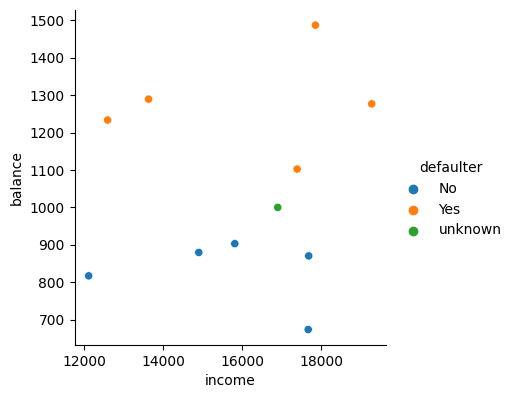

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

defaulter = pd.read_csv("C:\\D\\infosys\\datasets\\datasets\\defaulter\\defaulter.csv")
defaulter
import seaborn as sns

sns.pairplot(defaulter, hue = "defaulter", x_vars = "income", y_vars = "balance", height = 4)
x1 = defaulter.loc[0, ["balance", "income"]]
x2 = defaulter.loc[1, ["balance", "income"]]

np.linalg.norm(x1-x2)
t1 = np.array([26, 1000])
t2 = np.array([66, 1000])
t3 = np.array([36, 10000])

dist_t3_t1 = np.linalg.norm(t3-t1)

dist_t2_t3 = np.linalg.norm(t2-t3)

print("Distance between t2 and t3", dist_t2_t3, "\nDistance between t1 and t3", dist_t3_t1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance", "income"]])
defaulter["norm_balance"] = scaled_values[:, 0]
defaulter["norm_income"] = scaled_values[:, 1]
defaulter

x1_n = defaulter.loc[0, ["norm_balance", "norm_income"]]
x2_n = defaulter.loc[1, ["norm_balance", "norm_income"]]
np.linalg.norm(x1_n-x2_n)
x11 = defaulter.loc[10, ["norm_balance", "norm_income"]]
dist_to_x11 = lambda x: np.linalg.norm(x-x11)

defaulter["dist_to_x11"] = defaulter[["norm_balance", "norm_income"]].apply(dist_to_x11, axis =1)
defaulter.sort_values("dist_to_x11")


---
### 2. Decision tree

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

credit_data = pd.read_csv("C:\\D\\infosys\\datasets\\datasets\\credit_risk.csv")
X = credit_data.columns.drop("class")

y = credit_data['class']

credit_data_encoded = pd.get_dummies(credit_data[X])

print("Total number of predictors after encoding = ", 
     len(credit_data_encoded.columns))

credit_data_encoded.columns

Total number of predictors after encoding =  61


Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(credit_data_encoded, y, test_size = 0.15, random_state = 100)

print("Shape of X_trian and y_trian are: ", X_train.shape, "and", 
     y_train.shape, "respectively")
print("Shape of X_test and y_test are: ", X_test.shape, "and", 
     y_test.shape, "respectively")

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 1)
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_accuracy = model.score(X_train, y_train)
print("Accuracy of the model on the train data: ", train_accuracy)

test_accuracy = model.score(X_test, y_test)
print("Accuracy of the model on the test data: ", test_accuracy)
model1 = DecisionTreeClassifier(min_samples_split = 10, min_impurity_decrease = 0.005)
model1.fit(X_train, y_train)
print("train_accuracy = ", model1.score(X_train, y_train))


Shape of X_trian and y_trian are:  (850, 61) and (850,) respectively
Shape of X_test and y_test are:  (150, 61) and (150,) respectively
Accuracy of the model on the train data:  1.0
Accuracy of the model on the test data:  0.6533333333333333
train_accuracy =  0.7635294117647059


---
### 3. Linear regression

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

computers = pd.read_csv("C:\\D\\infosys\\datasets\\computers.csv")
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [ ]:
X = computers[['Units']]
y = computers['Minutes']
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  4.161654135338296
Coefficients:  [15.50877193]


In [ ]:
model.score(X, y)

0.9874371980620736

---
### 4. Logistic Regression

Text(0.5, 1.0, 'Age vs coronary heart disease')

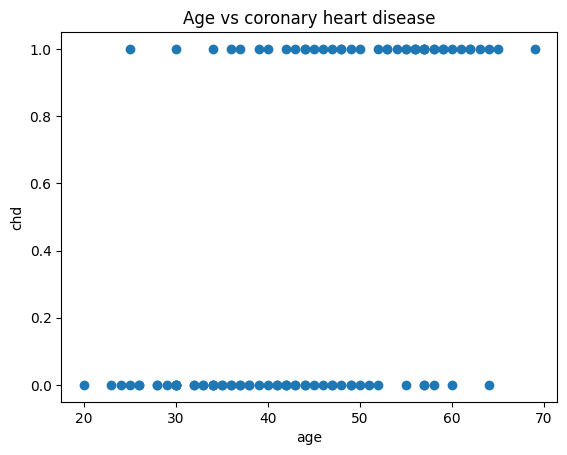

In [ ]:
# Applying the logistic regression on the data of the coronary heart disease
import pandas as pd

chd = pd.read_csv("C:\\D\\infosys\\chd_data.csv")
chd.head() 

# Visualization of the data

from matplotlib import pyplot as plt
%matplotlib inline

# plt.scatter("age", "chd", data = chd)
plt.scatter(chd.age, chd.chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs coronary heart disease")

In [ ]:
# Building a Logistic Regression model for coronary heart disease

from sklearn.model_selection import train_test_split

predictors = ["age"]
target = "chd"

X = chd[predictors]
y = chd[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (70, 1)
Shape of X_test (30, 1)
Shape of y_train (70,)
Shape of y_test (30,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print("Intercept: ", model.intercept_, "\n Coefficients: ", model.coef_)


Intercept:  [-5.65118929] 
 Coefficients:  [[0.11144281]]


In [ ]:
print("Accuracy score of the model on training data: ", model.score(X_train, y_train))
print("Accuracy sccore of the model on test data: ", model.score(X_test, y_test))

Accuracy score of the model on training data:  0.7428571428571429
Accuracy sccore of the model on test data:  0.7333333333333333


---
### 5. Clustering (k-means)

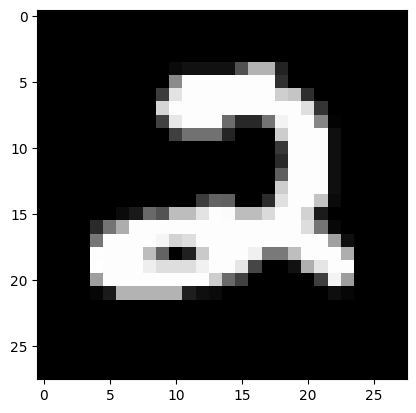

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\D\\infosys\\mnist_data.csv")
im = np.asarray(data.iloc[0:1,:]).reshape(28, 28)
plt.imshow(im, cmap = plt.cm.gray)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10)
model.fit(data)
print(np.unique(model.labels_))

[0 1 2 3 4 5 6 7 8 9]


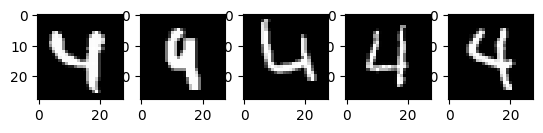

In [ ]:
cluster1 = data[model.labels_ == 0]

cluster1_imgs = cluster1.iloc[[np.random.randint(0, cluster1.shape[0])
for i in range(0, 5)]]

for i in range(0, cluster1_imgs.shape[0]):
    plt.subplot(1, 5, i + 1)
    img_fig = np.asarray(cluster1_imgs[i:i+1]).reshape(28, 28)
    plt.imshow(img_fig, cmap = plt.cm.gray)

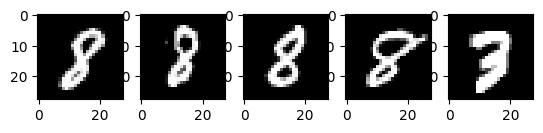

In [ ]:
cluster2 = data[model.labels_ == 1]
cluster2_imgs = cluster2.iloc[[np.random.randint(0, cluster2.shape[0])for i in range(0, 5)]]
for i in range(0, cluster2_imgs.shape[0]):
    plt.subplot(1, 5, i+1)
    img_fig = np.asarray(cluster2_imgs[i:i+1]).reshape(28, 28)
    plt.imshow(img_fig, cmap = plt.cm.gray)

---
### 6. Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = pd.read_csv("C:\\D\\infosys\\iris.csv")
v_nv_fn = lambda x: 0 if x=="versicolor" else 1
data["v_nv"] = data["Species"].apply(v_nv_fn)
data[data['v_nv']==0].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


In [ ]:
from sklearn.metrics import classification_report
X = data[["Petal.Length", "Petal.Width"]]
y = data["v_nv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(classification_report(y_test, model.predict(X_test)))

0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

